<a href="https://colab.research.google.com/github/Dee-Nwanjah/Python-Pandas-Mastery-Through-Real-Data/blob/main/E_commerce_Sales_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

# Set style for better looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load data
df = pd.read_csv('ecommerce_customer_data_large.csv')
print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
df.head()

Dataset shape: (73869, 13)

Columns: ['Customer ID', 'Purchase Date', 'Product Category', 'Product Price', 'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age', 'Returns', 'Customer Name', 'Age', 'Gender', 'Churn']


,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31.0,Female,0.0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31.0,Female,0.0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31.0,Female,0.0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31.0,Female,0.0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31.0,Female,0.0


In [5]:
# Basic data exploration(2nd Cell)
print("Data types:")
print(df.dtypes)
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
print(f"\nDate range: {df['Purchase Date'].min()} to {df['Purchase Date'].max()}")
print(f"Unique customers: {df['Customer ID'].nunique()}")
print(f"Unique products: {df['Product Category'].nunique()}")

Data types:
Customer ID                int64
Purchase Date             object
Product Category          object
Product Price              int64
Quantity                   int64
Total Purchase Amount      int64
Payment Method            object
Customer Age               int64
Returns                  float64
Customer Name             object
Age                      float64
Gender                    object
Churn                    float64
dtype: object

Date range: 2020-01-01 00:15:47 to 2023-09-13 18:42:49
Unique customers: 12629
Unique products: 4


In [11]:
# Convert date column to datetime
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

# Create additional date columns for analysis
df['Year'] = df['Purchase Date'].dt.year
df['Month'] = df['Purchase Date'].dt.month
df['Day'] = df['Purchase Date'].dt.day
df['Weekday'] = df['Purchase Date'].dt.day_name()


print("New columns added!")
display(df.head())

New columns added!


,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn,Year,Month,Day,Weekday,TotalAmount
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31.0,Female,0.0,2023,5,3,Wednesday,177
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31.0,Female,0.0,2021,5,16,Sunday,522
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31.0,Female,0.0,2020,7,13,Monday,413
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31.0,Female,0.0,2023,1,17,Tuesday,1188
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31.0,Female,0.0,2021,5,1,Saturday,1036


In [13]:
# Calculate key metrics
total_revenue = df['Total Purchase Amount'].sum()
total_transactions = df.shape[0] # Count the number of rows as transactions
total_customers = df['Customer ID'].nunique()
avg_order_value = total_revenue / total_transactions
total_products_sold = df['Quantity'].sum()

print("=== KEY PERFORMANCE INDICATORS ===")
print(f"💰 Total Revenue: ${total_revenue:,.2f}")
print(f"🛒 Total Transactions: {total_transactions:,}")
print(f"👥 Total Customers: {total_customers:,}")
print(f"📈 Average Order Value: ${avg_order_value:.2f}")
print(f"📦 Total Products Sold: {total_products_sold:,}")

=== KEY PERFORMANCE INDICATORS ===
💰 Total Revenue: $200,977,051.00
🛒 Total Transactions: 73,869
👥 Total Customers: 12,629
📈 Average Order Value: $2720.72
📦 Total Products Sold: 222,211


In [14]:
# Monthly revenue trend
monthly_revenue = df.groupby(['Year', 'Month'])['TotalAmount'].sum().reset_index()
monthly_revenue['Date'] = pd.to_datetime(monthly_revenue[['Year', 'Month']].assign(day=1))

print("\nMonthly Revenue:")
print(monthly_revenue)


Monthly Revenue:
    Year  Month  TotalAmount       Date
0   2020      1      1323626 2020-01-01
1   2020      2      1161436 2020-02-01
2   2020      3      1306877 2020-03-01
3   2020      4      1305426 2020-04-01
4   2020      5      1325907 2020-05-01
5   2020      6      1245294 2020-06-01
6   2020      7      1307661 2020-07-01
7   2020      8      1359842 2020-08-01
8   2020      9      1271555 2020-09-01
9   2020     10      1308959 2020-10-01
10  2020     11      1259963 2020-11-01
11  2020     12      1264470 2020-12-01
12  2021      1      1240493 2021-01-01
13  2021      2      1168279 2021-02-01
14  2021      3      1241848 2021-03-01
15  2021      4      1227974 2021-04-01
16  2021      5      1338933 2021-05-01
17  2021      6      1223772 2021-06-01
18  2021      7      1272984 2021-07-01
19  2021      8      1286792 2021-08-01
20  2021      9      1248781 2021-09-01
21  2021     10      1283052 2021-10-01
22  2021     11      1242320 2021-11-01
23  2021     12      1

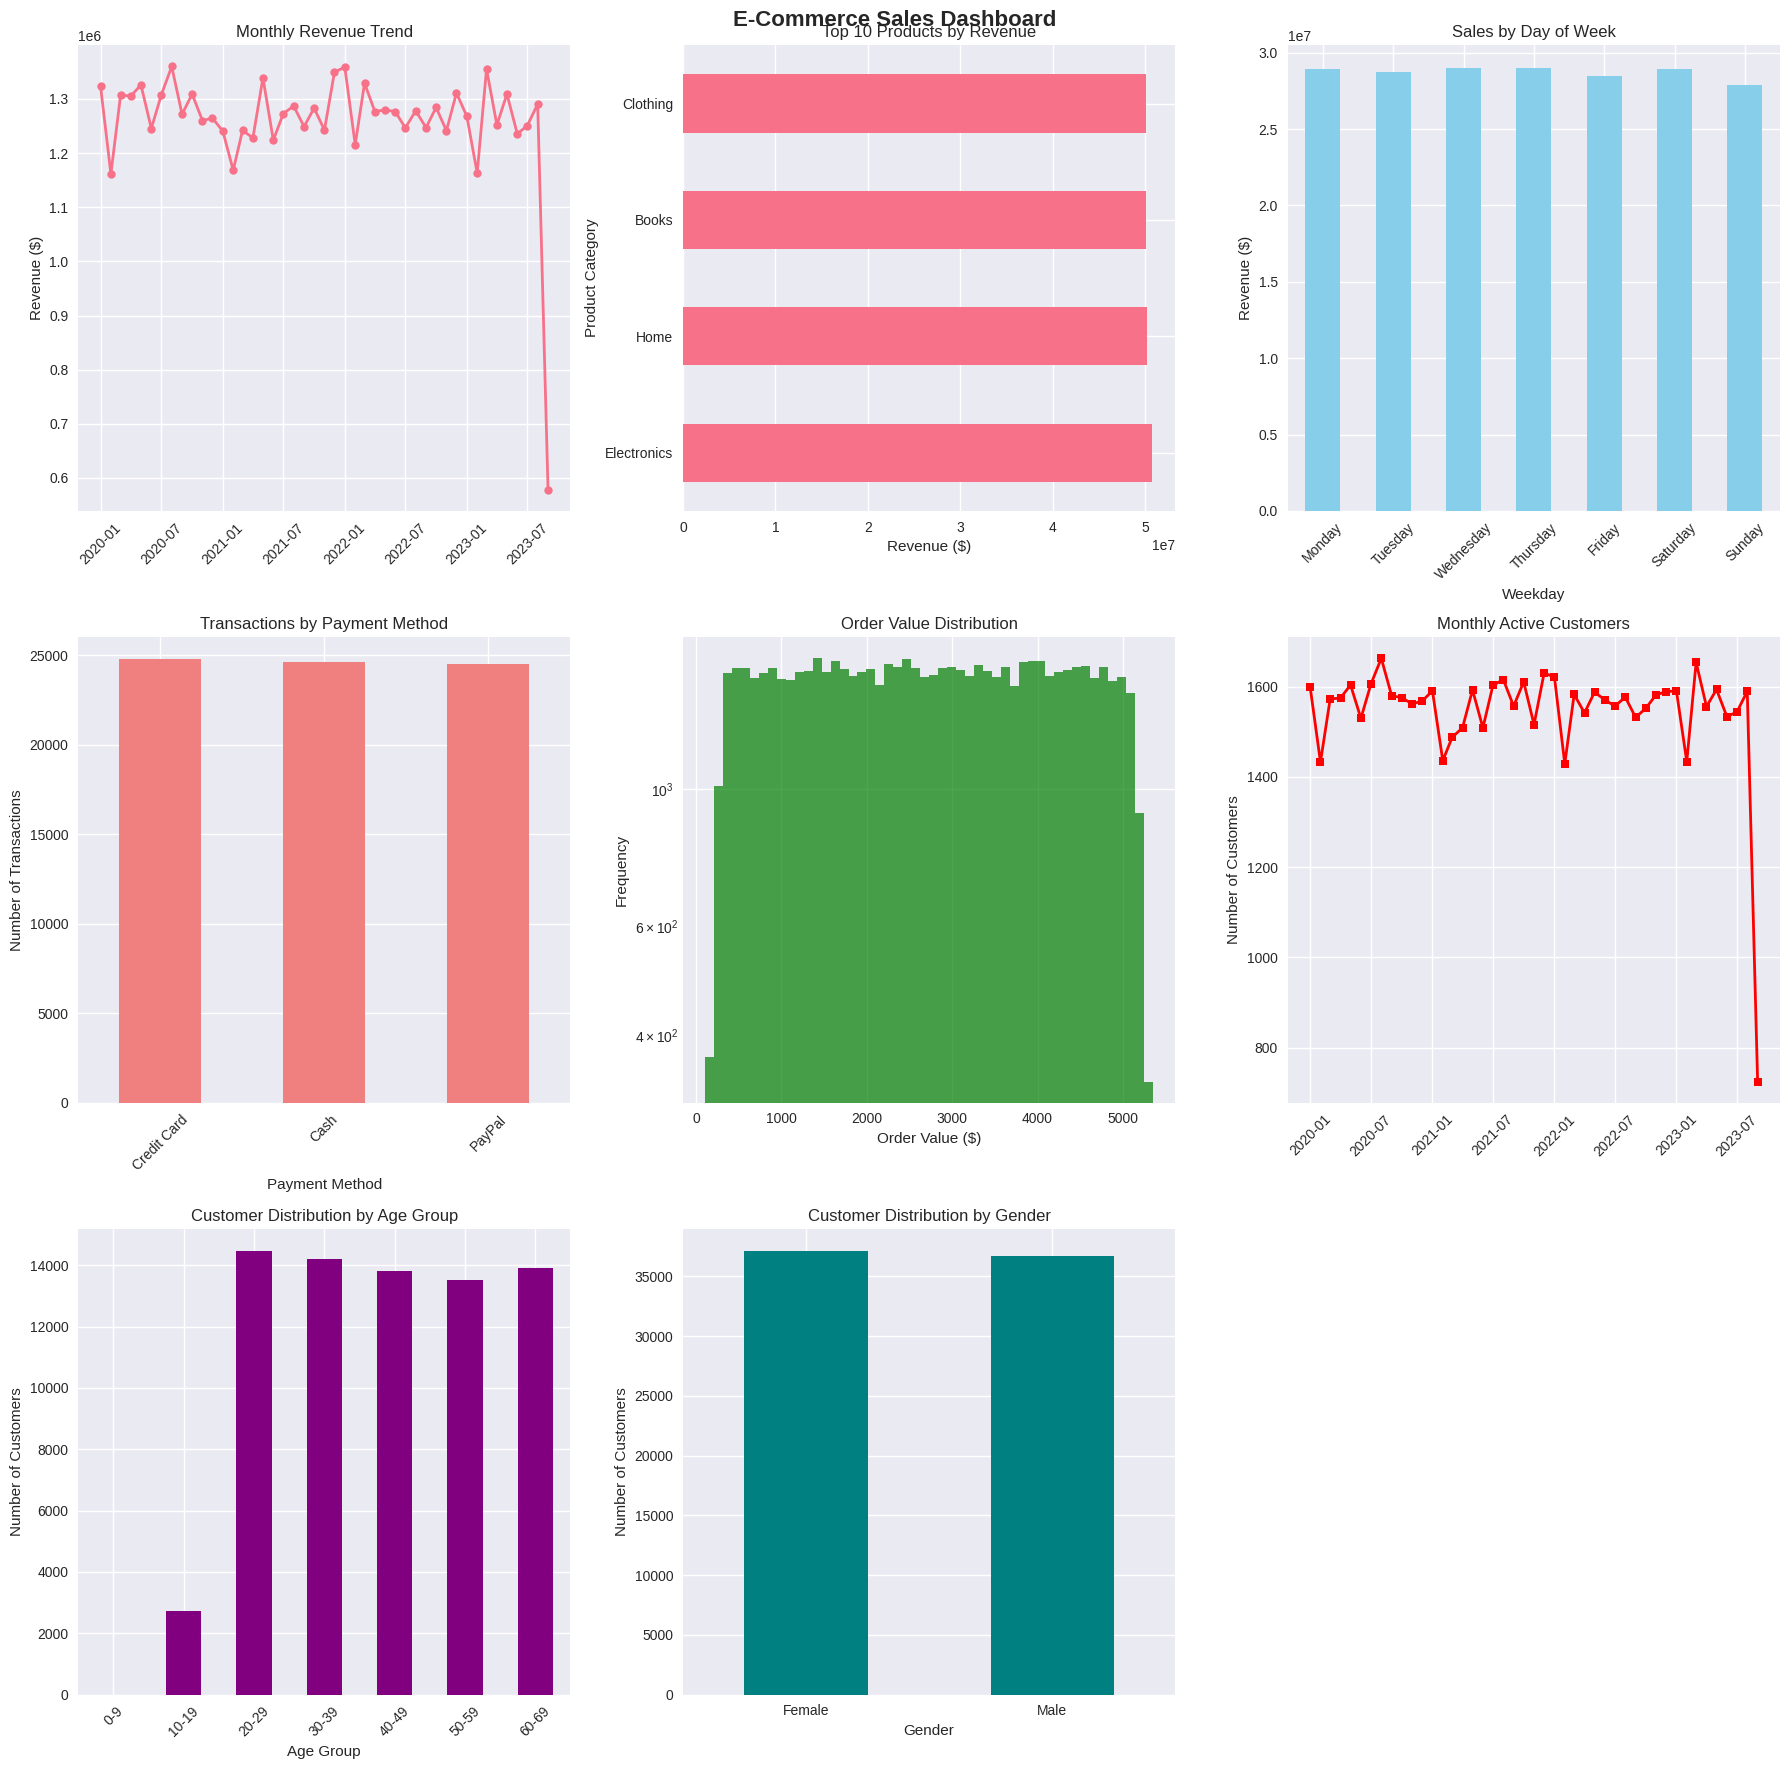

In [17]:
# Create a comprehensive dashboard with a 3x3 layout
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
fig.suptitle('E-Commerce Sales Dashboard', fontsize=16, fontweight='bold')

# Flatten the axes array for easier indexing
axes = axes.flatten()

# 1. Monthly Revenue Trend
axes[0].plot(monthly_revenue['Date'], monthly_revenue['TotalAmount'],
                marker='o', linewidth=2, markersize=6)
axes[0].set_title('Monthly Revenue Trend')
axes[0].set_ylabel('Revenue ($)')
axes[0].tick_params(axis='x', rotation=45)

# 2. Top 10 Products by Revenue
product_revenue = df.groupby('Product Category')['Total Purchase Amount'].sum().nlargest(10)
product_revenue.plot(kind='barh', ax=axes[1])
axes[1].set_title('Top 10 Products by Revenue')
axes[1].set_xlabel('Revenue ($)')

# 3. Sales by Day of Week
daily_sales = df.groupby('Weekday')['Total Purchase Amount'].sum()
# Reorder days properly
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales = daily_sales.reindex(day_order)
daily_sales.plot(kind='bar', ax=axes[2], color='skyblue')
axes[2].set_title('Sales by Day of Week')
axes[2].set_ylabel('Revenue ($)')
axes[2].tick_params(axis='x', rotation=45)

# 4. Transactions by Payment Method
payment_method_counts = df['Payment Method'].value_counts()
payment_method_counts.plot(kind='bar', ax=axes[3], color='lightcoral')
axes[3].set_title('Transactions by Payment Method')
axes[3].set_ylabel('Number of Transactions')
axes[3].tick_params(axis='x', rotation=45)

# 5. Order Value Distribution
axes[4].hist(df.groupby(df.index)['Total Purchase Amount'].sum(), bins=50, alpha=0.7, color='green')
axes[4].set_title('Order Value Distribution')
axes[4].set_xlabel('Order Value ($)')
axes[4].set_ylabel('Frequency')
axes[4].set_yscale('log')

# 6. Monthly Customer Count
monthly_customers = df.groupby(['Year', 'Month'])['Customer ID'].nunique().reset_index()
monthly_customers['Date'] = pd.to_datetime(monthly_customers[['Year', 'Month']].assign(day=1))
axes[5].plot(monthly_customers['Date'], monthly_customers['Customer ID'],
                marker='s', linewidth=2, markersize=6, color='red')
axes[5].set_title('Monthly Active Customers')
axes[5].set_ylabel('Number of Customers')
axes[5].tick_params(axis='x', rotation=45)

# 7. Customer Distribution by Age Group
# Define age bins and labels
age_bins = list(range(0, df['Customer Age'].max() + 10, 10))
age_labels = [f'{i}-{i+9}' for i in age_bins[:-1]]
df['Age Group'] = pd.cut(df['Customer Age'], bins=age_bins, labels=age_labels, right=False)
customer_age_distribution = df['Age Group'].value_counts().sort_index()
customer_age_distribution.plot(kind='bar', ax=axes[6], color='purple')
axes[6].set_title('Customer Distribution by Age Group')
axes[6].set_xlabel('Age Group')
axes[6].set_ylabel('Number of Customers')
axes[6].tick_params(axis='x', rotation=45)

# 8. Customer Distribution by Gender
customer_gender_distribution = df['Gender'].value_counts()
customer_gender_distribution.plot(kind='bar', ax=axes[7], color='teal')
axes[7].set_title('Customer Distribution by Gender')
axes[7].set_xlabel('Gender')
axes[7].set_ylabel('Number of Customers')
axes[7].tick_params(axis='x', rotation=0)

# Hide the last empty subplot
fig.delaxes(axes[8])

plt.tight_layout()
plt.show()

In [21]:
# Customer segmentation analysis
customer_metrics = df.groupby('Customer ID').agg(
    CustomerName=('Customer Name', 'first'), # Include customer name
    OrderCount=('Purchase Date', 'nunique'),  # Number of orders
    TotalSpent=('Total Purchase Amount', 'sum'),    # Total spent
    LastPurchase=('Purchase Date', 'max')     # Last purchase date
)

# Calculate days since last purchase
customer_metrics['DaysSinceLastPurchase'] = (datetime.now() - customer_metrics['LastPurchase']).dt.days

print("=== CUSTOMER SEGMENTATION ===")
print("\nTop 10 Customers by Total Spent:")
print(customer_metrics.nlargest(10, 'TotalSpent')[['CustomerName', 'OrderCount', 'TotalSpent']])

# Simple customer segments
def segment_customer(row):
    if row['TotalSpent'] > 1000 and row['OrderCount'] > 5:
        return 'VIP'
    elif row['TotalSpent'] > 500:
        return 'High Value'
    elif row['OrderCount'] > 3:
        return 'Frequent'
    else:
        return 'Regular'

customer_metrics['Segment'] = customer_metrics.apply(segment_customer, axis=1)
print("\nCustomer Segments:")
print(customer_metrics['Segment'].value_counts())

=== CUSTOMER SEGMENTATION ===

Top 10 Customers by Total Spent:
                CustomerName  OrderCount  TotalSpent
Customer ID                                         
39717          Joseph Kaiser          14       50496
48382          Katelyn Clark          17       50179
24468          Antonio Smith          14       46683
13805        Timothy Proctor          15       46567
32869           Sarah Garcia          15       46080
13400              Jodi Moon          14       46057
14772        Mrs. Holly Pope          13       45642
6347             Lori Taylor          14       45481
26259          Anthony Perez          12       45467
12647           Taylor Grant          15       44562

Customer Segments:
Segment
VIP           6696
High Value    5927
Regular          6
Name: count, dtype: int64
